In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
import sklearn.linear_model as linear_model
#import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree

In [2]:
df = pd.read_csv("adult.data", names=['age', 'workclass','fnlwgt','education','education-num','maritalstatus','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','nativecountry','salary'],sep=r'\s*,\s*',
        engine='python',
        na_values="?")
df

,age,workclass,fnlwgt,education,education-num,maritalstatus,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,nativecountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'maritalstatus', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'nativecountry',
       'salary'],
      dtype='object')

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
maritalstatus     object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
nativecountry     object
salary            object
dtype: object

In [5]:
df.shape

(32561, 15)

In [6]:
df.isna().any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
maritalstatus     False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
nativecountry      True
salary            False
dtype: bool

In [7]:
#univariate analysis analysis of categorical variables
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [8]:
df.education.value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [9]:
df.maritalstatus.value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: maritalstatus, dtype: int64

In [10]:
df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [11]:
df.relationship.value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [12]:
df.race.value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [13]:
df.sex.value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [14]:
df.nativecountry.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [15]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


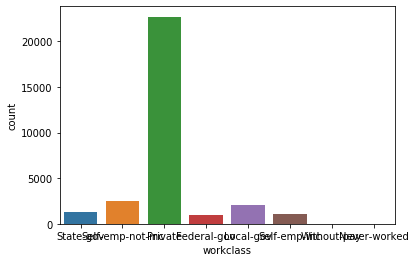

In [16]:
sns.countplot(x="workclass", data=df)

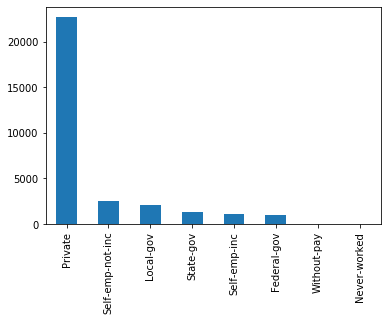

In [17]:
df['workclass'].value_counts().plot.bar() #make a quick plot

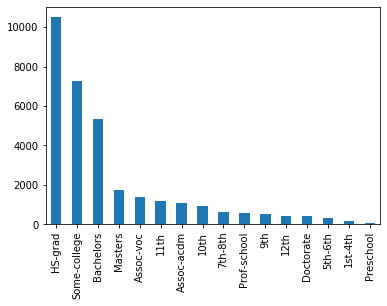

In [18]:
df['education'].value_counts().plot.bar() #make a quick plot

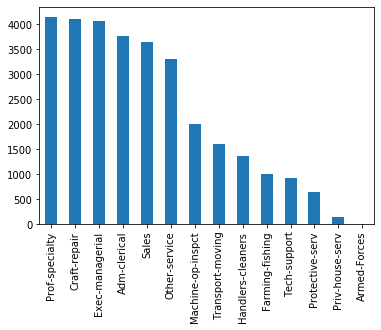

In [19]:
df['occupation'].value_counts().plot.bar() #make a quick plot

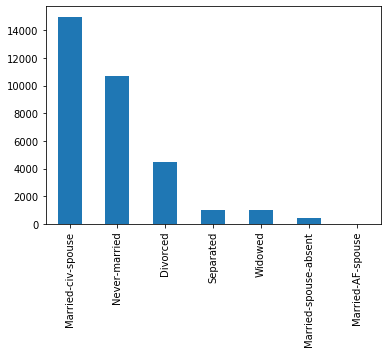

In [20]:
df['maritalstatus'].value_counts().plot.bar() #make a quick plot

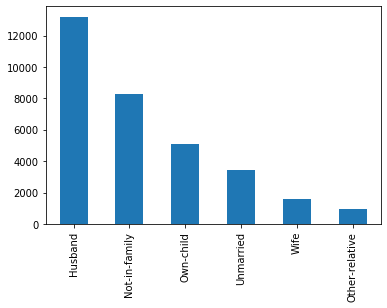

In [21]:
df['relationship'].value_counts().plot.bar() #make a quick plot

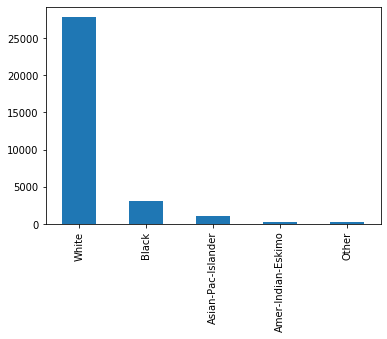

In [22]:
df['race'].value_counts().plot.bar() #make a quick plot

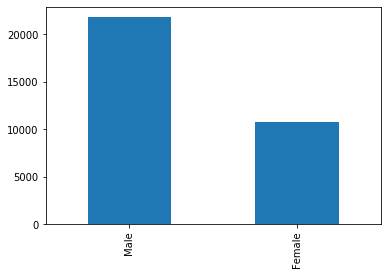

In [23]:
df['sex'].value_counts().plot.bar() #make a quick plot

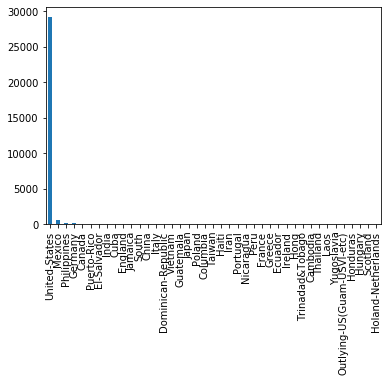

In [24]:
df['nativecountry'].value_counts().plot.bar() #make a quick plot

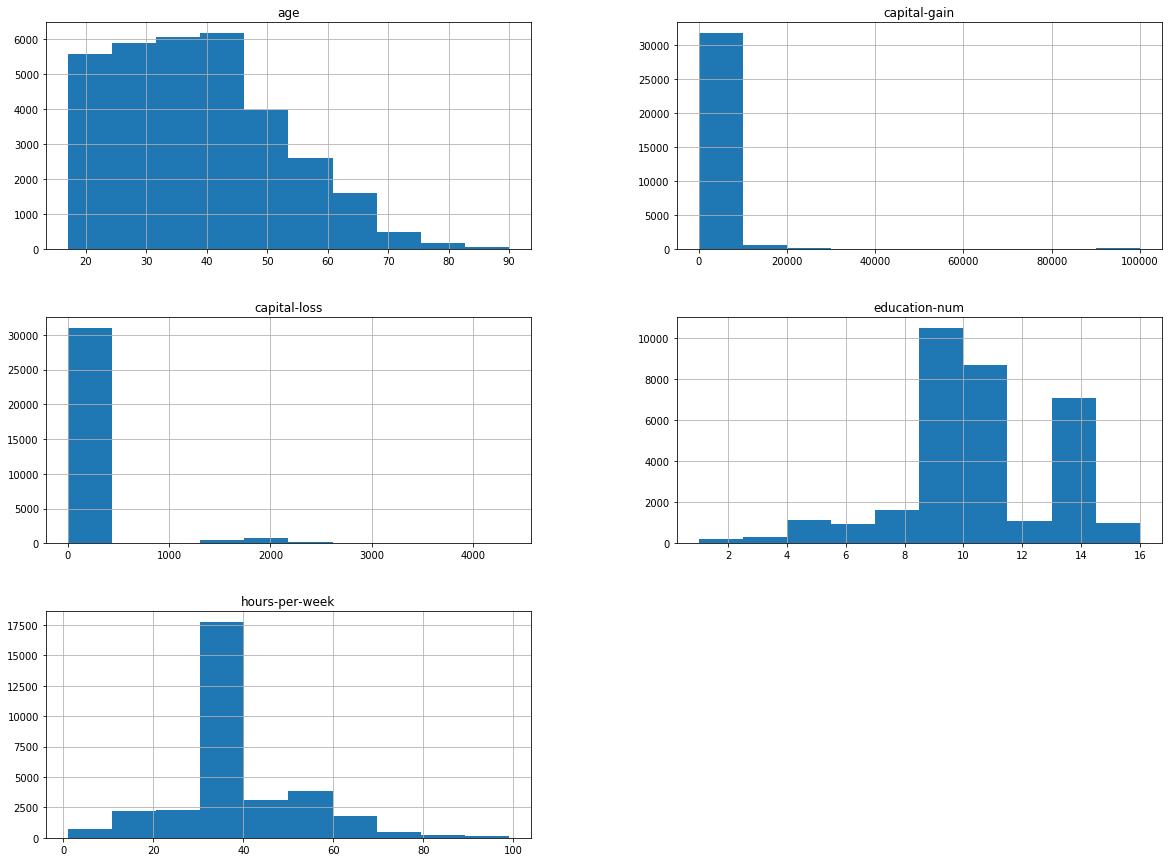

In [25]:
# Univariate graphs to see the distribution
df[["education-num","age","capital-gain","capital-loss","hours-per-week"]].hist(figsize=(20, 15))
plt.show()
#,"relationship","race","sex","nativecountry

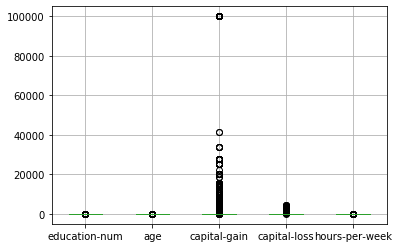

In [26]:
df[["education-num","age","capital-gain","capital-loss","hours-per-week"]].boxplot()

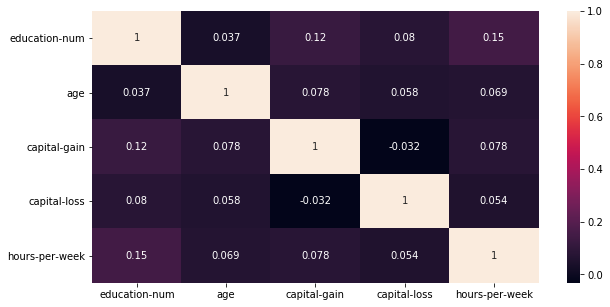

In [27]:
#Bivariate analysis Both Quantitative
plt.subplots(figsize=(10, 5))
correlation_matrix = df[["education-num","age","capital-gain","capital-loss","hours-per-week"]].corr() #get correlation for all cols execpt calss since it's catergorical
sns.heatmap(correlation_matrix,annot=True)

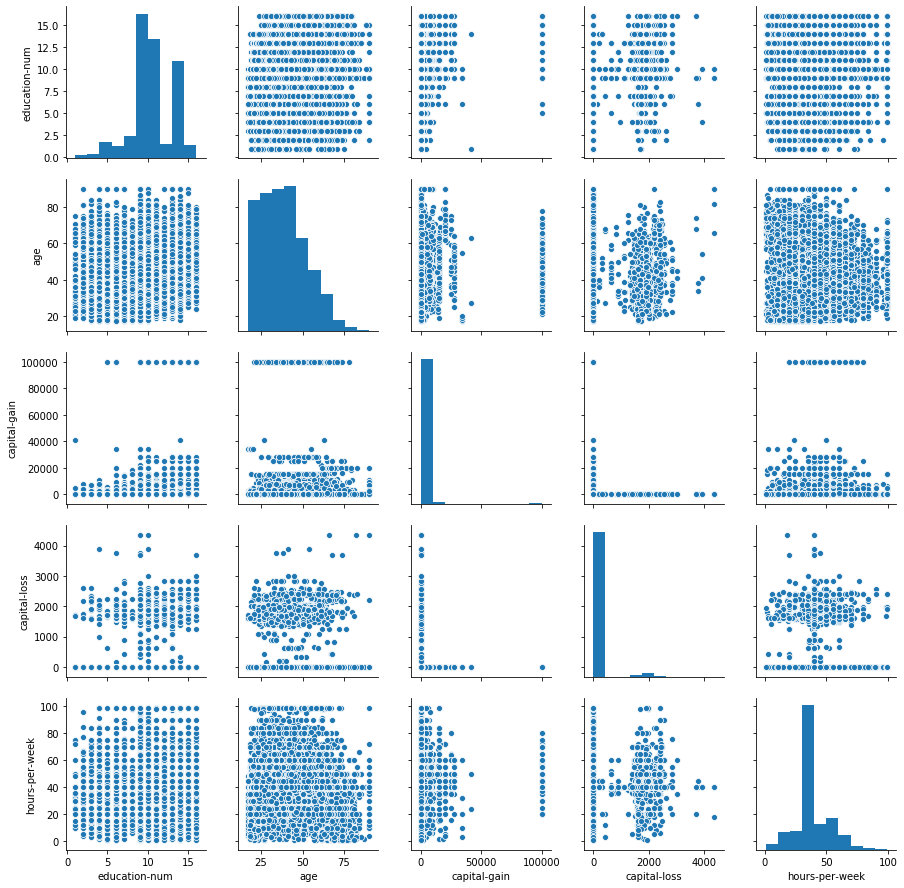

In [28]:
sns.pairplot(df[["education-num","age","capital-gain","capital-loss","hours-per-week"]])

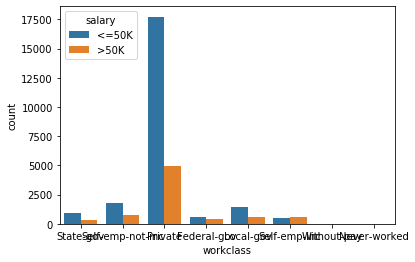

In [29]:
#bivariate Both qualitative
sns.countplot(x="workclass", data=df,hue="salary" )

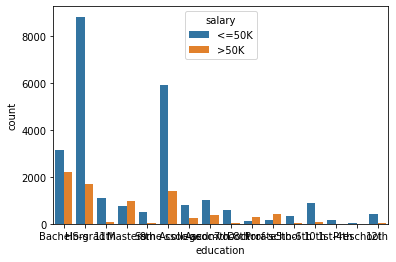

In [30]:
sns.countplot(x="education", data=df,hue="salary") 
plt.show()

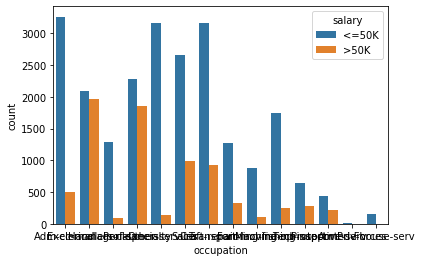

In [31]:
sns.countplot(x="occupation", data=df,hue="salary")

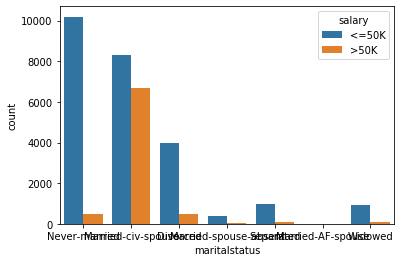

In [32]:
sns.countplot(x="maritalstatus", data=df,hue="salary")

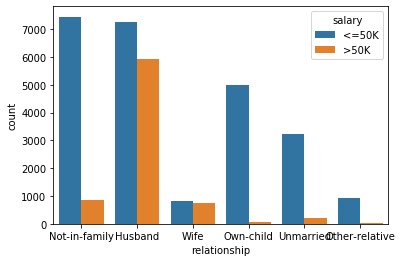

In [33]:
sns.countplot(x="relationship", data=df,hue="salary")

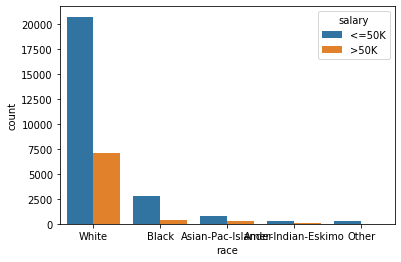

In [34]:
sns.countplot(x="race", data=df,hue="salary")

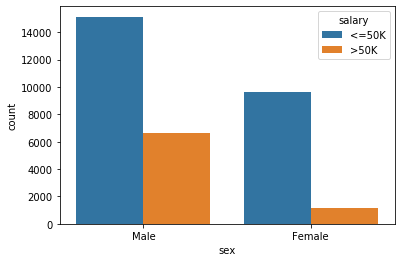

In [35]:
sns.countplot(x="sex", data=df,hue="salary")

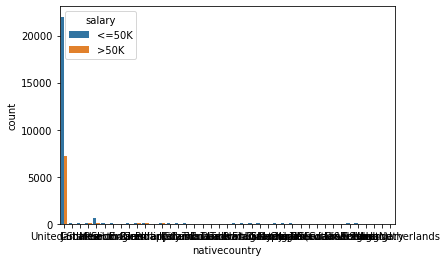

In [36]:
sns.countplot(x="nativecountry", data=df,hue="salary")

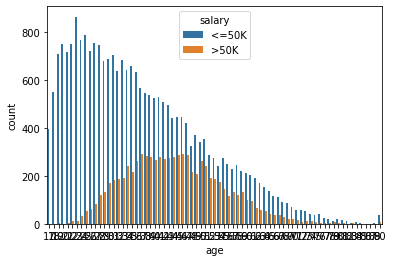

In [37]:
#Quantitative and Qualitative 
sns.countplot(x="age", data=df,hue="salary" )

In [38]:
missing_values = df.isnull().sum()
missing_values

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
maritalstatus        0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
nativecountry      583
salary               0
dtype: int64

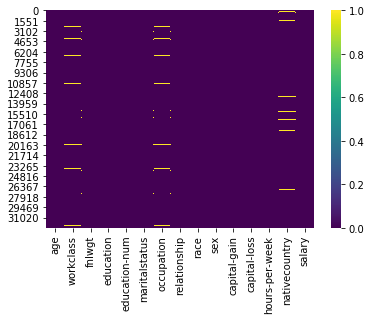

In [39]:
missing_values = df.isnull()
missing_values
sns.heatmap(data = missing_values, cmap='viridis')

In [40]:
# since Cabin has too many missing values, we will drop the column
#df = df.drop(columns = "Cabin")

In [41]:
# Fill Age with median 
df["workclass"] = df["workclass"].fillna(df["workclass"].mean())

TypeError: can only concatenate str (not "int") to str

In [ ]:
# lets check for missing values again
missing_values = df.isnull()
missing_values
sns.heatmap(data = missing_values, cmap='viridis')